mpg 데이터는 1988년, 2004년, 2008년도에 미국에서 생산된 자동차 관련 정보

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#seaborn 에서 제공하는 그래프 테마
sns.set_style('ticks')
sns.set_style('darkgrid')
sns.set_style('whitegrid')

# 그래프를 그리기 위한 기본 설정
# 폰트 설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6

# 글자 크기
plt.rcParams['font.size'] = 14

# 폰트 설정 시 - 기호 깨는거 방지하기
plt.rcParams['axes.unicode_minus'] = False

# 데이터 가져오기

In [115]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


# 데이터 살펴보기
- manufacturer : 제조사
- model : 자동차 모델명
- displ : 배기량
- year : 생산년도
- cyl : 실린더 개수
- trans : 변속기 종류
- drv : 구동방식
- cty : 시내연비
- hwy : 고속도로연비
- fl : 연료종류(c : 가스, d : 디젤, e : 에탄올 혼합연료, p : 고급휘발유, r : 보동휘발유)
- class : 자동차 종류

In [116]:
# 데이터 프레임의 크기를 확인한다
a1, a2 = mpg_df.shape
print(f'행의 크기 : {a1}')
print(f'열의 크기 : {a2}')

행의 크기 : 234
열의 크기 : 12


In [117]:
# 데이터 프레임 개요 정보
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


# 문제1 : 자동차 배기량에 따라 고속도로 연비가 다른지 알아본다.
- displ(배기량)이 4 이하인 자동차와 5이상인 자동차 중 어떤 자동차의 hwy(고속도로연비)가 평균적으로 더 높은지 알아보자

In [118]:
index = mpg_df['displ'] <= 4
mpg_4low = mpg_df[index]

index = mpg_df['displ'] > 4
mpg_5high = mpg_df[index]

print(mpg_4low['hwy'].mean(), mpg_5high['hwy'].mean())

25.96319018404908 17.64788732394366


In [119]:
# 배기량이 4 이하인 자동차의 고속도로 연비 평균
mpg_a = mpg_df.query('displ <= 4')
a1 = mpg_a['hwy'].mean()

In [120]:
# 배기량이 4 초과인 자동차의 고속도로 연비 평균
mpg_b = mpg_df.query('displ > 4')
a2 = mpg_b['hwy'].mean()

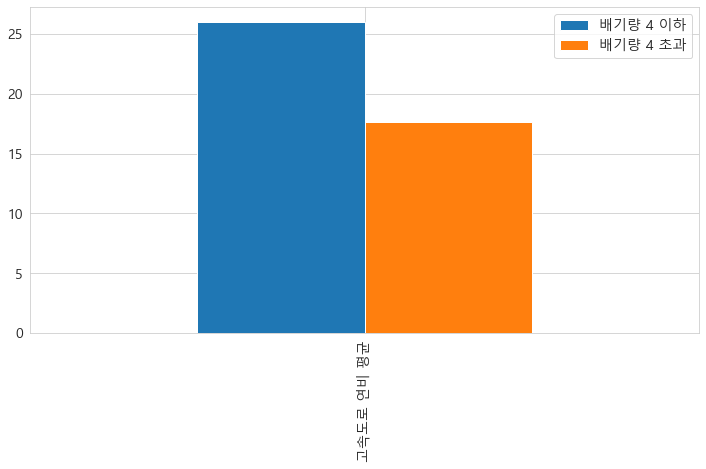

In [121]:
# 데이터 프레임
d1 = {
    '배기량 4 이하' : [a1],
    '배기량 4 초과' : [a2]
}

tmp_df = pd.DataFrame(d1)
tmp_df.index = ['고속도로 연비 평균']

tmp_df.plot.bar()
plt.show()

,배기량,고속도로 평균연비
0,4 이하,25.963190
1,4 초과,17.647887


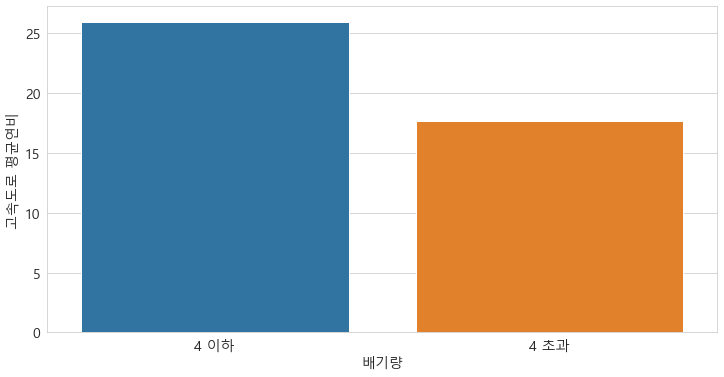

In [122]:
d1 = {
    '배기량' : ['4 이하', '4 초과'],
    '고속도로 평균연비' : [a1, a2]
}

temp_df = pd.DataFrame(d1)
display(temp_df)

sns.barplot(x = '배기량', y = '고속도로 평균연비', data = temp_df)
plt.show()

# 문제 2 : 자동차 제조 회사에 따라 시내 연비가 다른지 알아본다.

In [123]:
mpg_df.groupby('manufacturer').mean()['cty']

manufacturer
audi          17.611111
chevrolet     15.000000
dodge         13.135135
ford          14.000000
honda         24.444444
hyundai       18.642857
jeep          13.500000
land rover    11.500000
lincoln       11.333333
mercury       13.250000
nissan        18.076923
pontiac       17.000000
subaru        19.285714
toyota        18.529412
volkswagen    20.925926
Name: cty, dtype: float64

In [124]:
# 자동차 회사와 도시 연비를 가져온다
df_tmp = mpg_df[['manufacturer', 'cty']]
df_tmp

,manufacturer,cty
0,audi,18
1,audi,21
2,audi,20
3,audi,21
4,audi,16
...,...,...
229,volkswagen,19
230,volkswagen,21
231,volkswagen,16
232,volkswagen,18


In [125]:
# 제조사별 도시 연비 평균을 구한다.
df_result = df_tmp.groupby('manufacturer').mean()
df_result

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


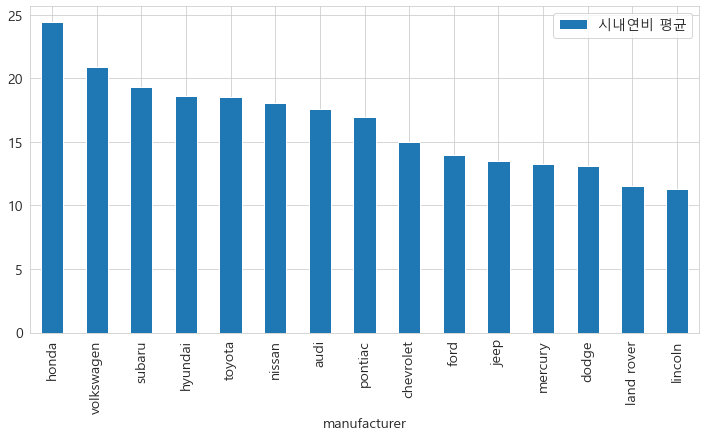

In [126]:
# 도시 연비를 기준으로 정렬한다
df_result.sort_values('cty', ascending=False, inplace = True)

df_result.columns = ['시내연비 평균']

df_result.plot.bar()
plt.show()

In [127]:
# 데이터 프레임의 인덱스를 리셋한다. (이 때 drop = True를 하지 않으면 인덱스가 컬럼으로 포함된다)

df_result.reset_index(inplace = True)
df_result.columns = ['제조사', '도시 연비 평균']
df_result

,제조사,도시 연비 평균
0,honda,24.444444
1,volkswagen,20.925926
2,subaru,19.285714
3,hyundai,18.642857
4,toyota,18.529412
5,nissan,18.076923
6,audi,17.611111
7,pontiac,17.000000
8,chevrolet,15.000000
9,ford,14.000000


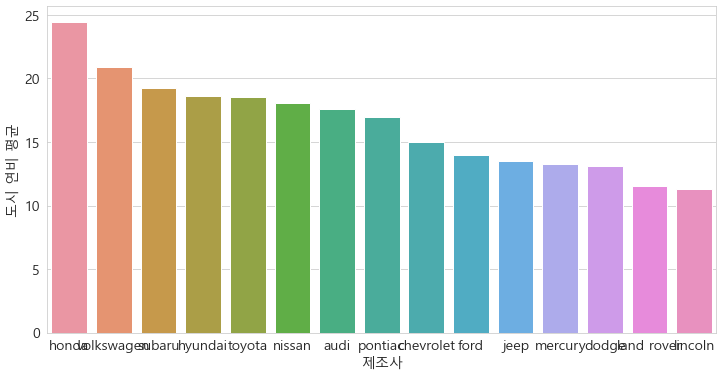

In [129]:
sns.barplot(x = '제조사', y = '도시 연비 평균', data = df_result)
plt.show()